Saving Nvidia_Report (2).csv to Nvidia_Report (2) (11).csv
         Date    Open    High     Low   Close       Volume
0  02/05/2025  121.76  125.00  120.76  124.83  263,110,594
1  02/04/2025  116.96  121.20  116.70  118.65  256,550,000
2  02/03/2025  114.75  118.57  113.01  116.66  371,235,719
3  01/31/2025  123.78  127.85  119.19  120.07  390,372,906
4  01/30/2025  123.10  125.00  118.10  124.65  392,925,500
Mean Absolute Error: 2.026518276037794
Mean Squared Error: 7.759841375215714
Root Mean Squared Error: 2.7856491838018145
R-Rooted Score: 0.87921441430083


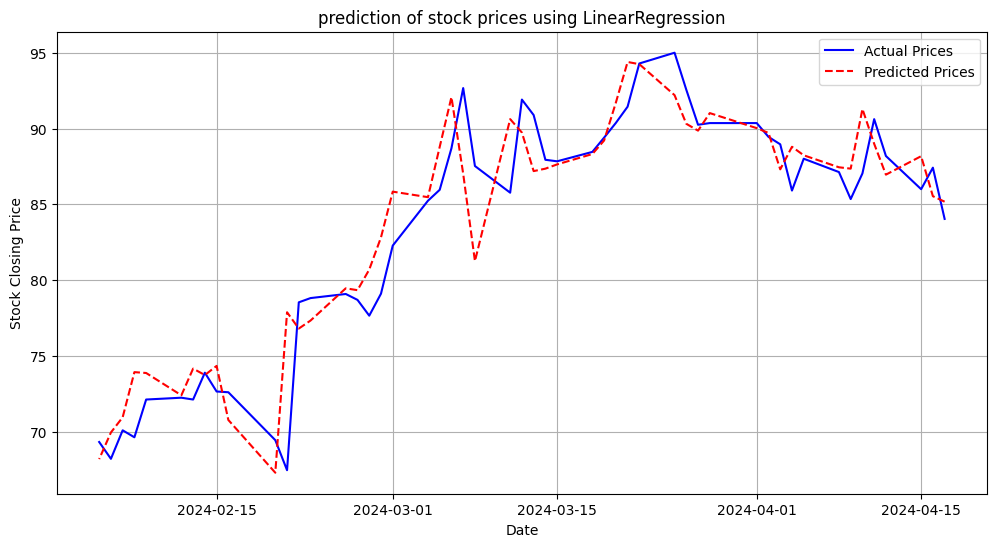

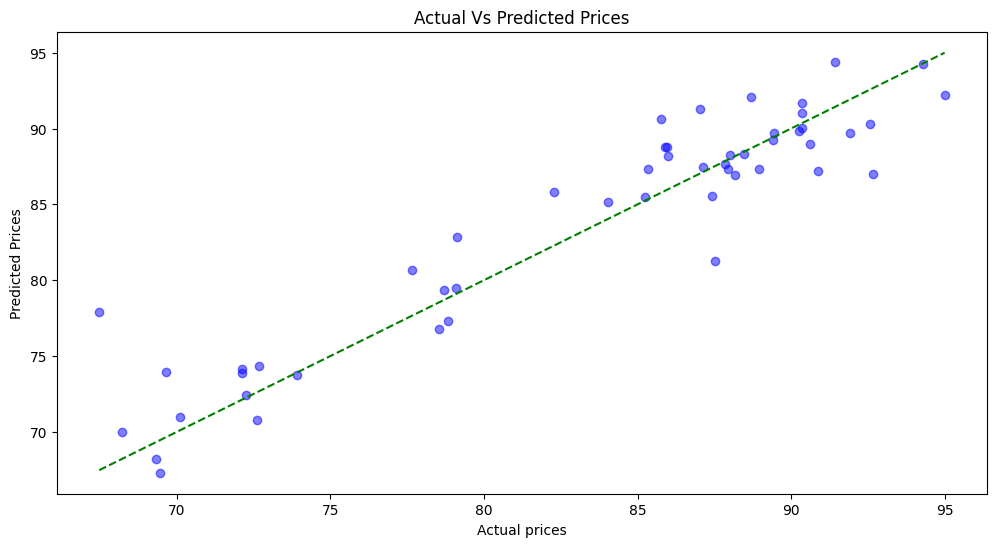

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
print(df.head())

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['Volume'] = df['Volume'].str.replace(',', '', regex=True).astype(float)

df['Prev_Close'] = df['Close'].shift(1)

df.dropna(inplace=True)

X = df[['Prev_Close', 'Volume']]
Y = df['Close']

#Splitting the data into Training and testing sets
test_size = 0.2
split_index = int(len(df)*(1 - test_size))

X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]

#Model input
model = LinearRegression()
model.fit(X_train, Y_train)

#Based on the training of the data, predict the Y = Volume
Y_predict = model.predict(X_test)

mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_predict)

#Evaluated metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Rooted Score: {r2}")


#Plot - Actual vs Prediction Prices
plt.figure(figsize=(12,6))
plt.plot(Y_test.index, Y_test, label = 'Actual Prices', color = 'Blue')
plt.plot(Y_test.index, Y_predict, label = 'Predicted Prices', color = 'Red', linestyle = 'dashed')
plt.xlabel('Date')
plt.ylabel('Stock Closing Price')
plt.title('prediction of stock prices using LinearRegression')
plt.legend()
plt.grid(True)
plt.show()

#Scatter Plot - Actual vs prediction Prices
plt.figure(figsize=(12,6))
plt.scatter(Y_test, Y_predict, color = 'blue', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color = 'Green', linestyle = 'dashed')
plt.xlabel('Actual prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Vs Predicted Prices')
plt.show()
















